# Курсовая работа № 2
## Аналитика. Начальный уровень

Курсовая работа состоит из двух частей – обязательной и дополнительной. **Для зачета необходимо выполнение только первой части.** Выполнение второй части может потребовать дополнительные знания Python.

- [Часть первая](#Часть-первая)
- [Часть вторая](#Часть-вторая)

## Часть первая


Перед вами стоит задача – подготовить аналитический отчет для HR-отдела. На основании проведенной аналитики предполагается составить рекомендации для отдела кадров по стратегии набора персонала, а также по взаимодействию с уже имеющимися сотрудниками.
<br><br> В базе данных лежит набор таблиц, которые содержат данные о сотрудниках вымышленной компании.
Сделайте обзор штата сотрудников компании. Составьте набор предметов исследования, а затем проверьте их на данных. Вся аналитика должна быть выполена с помощью SQL. Впоследствии данные можно визуализировать, однако финальные датафреймы для графиков также должны быть подготовлены с помощью SQL. <br><br>

Примеры гипотез:
1. Есть зависимость между `perfomance score` и тем, под чьим руководством работает сотрудник.
2. Есть зависимость между продолжительностью работы в компании и семейным положением сотрудника.
2. Есть зависимость между продолжительностью работы в компании и возрастом сотрудника.

<br><br>
Параметры для подключения следующие: хост – `dsstudents.skillbox.ru`, порт – `5432`, имя базы данных – `human_resources`, пользователь – `readonly`, пароль – `6hajV34RTQfmxhS`. Таблицы, доступные для анализа, – `hr_dataset`, `production_staff`, `recruting_costs`, `salary_grid`.

In [83]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt

In [84]:
pg_connection = {
    "host": "dsstudents.skillbox.ru",
    "port": 5432,
    "dbname": "human_resources",
    "user": "readonly",
    "password": "6hajV34RTQfmxhS"
}
conn = psycopg2.connect(**pg_connection)

cursor = conn.cursor()

1. Есть ли зависимость между perfomance score и тем, под чьим руководством работает сотрудник.

In [85]:
#Выбрать всех менеджеров и посчитать количество каждой оценки у каждого менеджера
sql_str = 'SELECT "Manager Name", "Performance Score", COUNT("Performance Score")\
    FROM hr_dataset GROUP BY "Manager Name", "Performance Score" ORDER BY "Manager Name" DESC'
manager_score = pd.read_sql_query(sql_str, conn)

#Выбрать всех менеджеров и загрузить их в list
cursor.execute('SELECT DISTINCT("Manager Name")  FROM hr_dataset')
manager_list = [a[0] for a in cursor.fetchall()]

conn.commit()
manager_score.head()

,Manager Name,Performance Score,count
0,Webster Butler,Exceeds,2
1,Webster Butler,Needs Improvement,2
2,Webster Butler,Fully Meets,11
3,Webster Butler,90-day meets,3
4,Webster Butler,N/A- too early to review,3


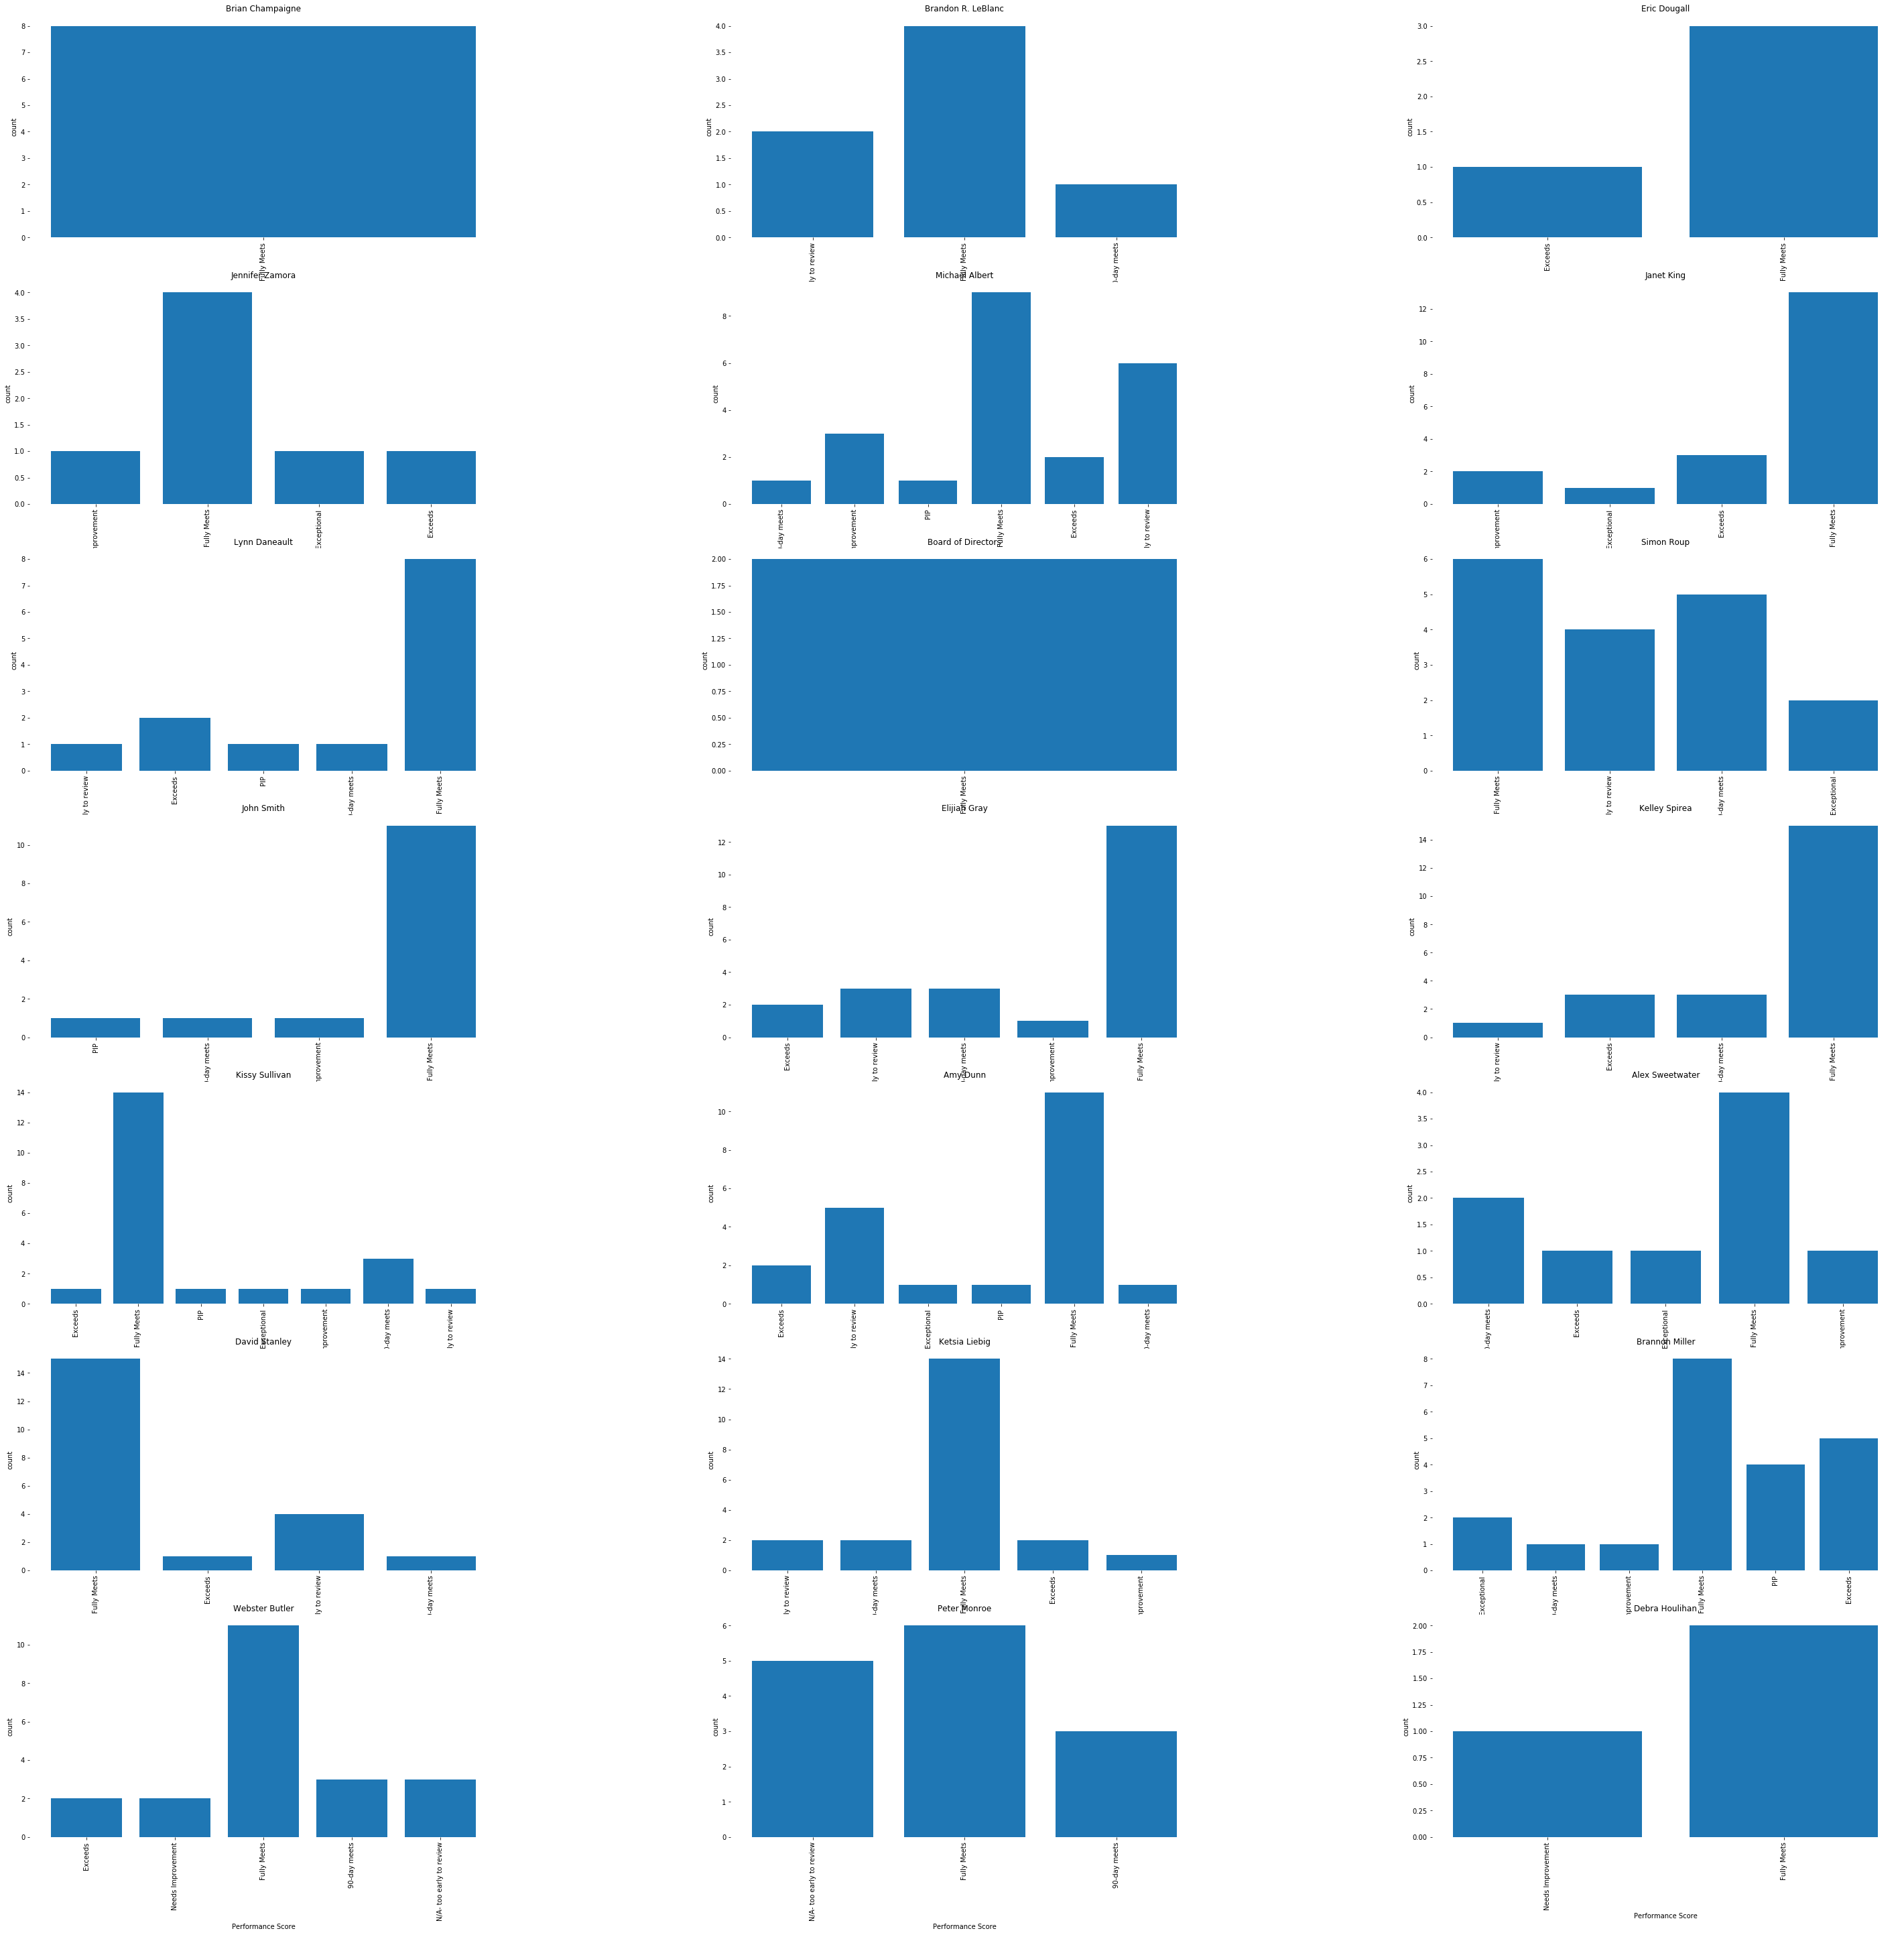

In [86]:
fig, axs = plt.subplots(7,3, gridspec_kw={'hspace': 0.2, 'wspace': 0.5}, figsize=(50,50))

#цикл по курсам и создание графиков
i=0
b=0

#gr_home_work_merged['course_title'], gr_home_work_merged['conversion'], gr_home_work_merged['module_title']

for item in manager_list:

    x = manager_score['Performance Score'][manager_score['Manager Name'] == item]
    y = manager_score['count'][manager_score['Manager Name'] == item]
      
    #формирование графика
    axs[i,b].bar(x, y)
    
    #наименование графиков
    axs[i, b].set_title(item)
    
    #наименование осей
    axs[i, b].set_xlabel('Performance Score')
    axs[i, b].set_ylabel('count')
    
    axs[i, b].tick_params(axis='x', rotation=90) 
 
    #убрать рамки у графика
    axs[i, b].spines['right'].set_visible(False)
    axs[i, b].spines['top'].set_visible(False)
    axs[i, b].spines['bottom'].set_visible(False)
    axs[i, b].spines['left'].set_visible(False)
    
    if i != 6:
        i += 1
    else:
        i = 0
    if b != 2:
        b += 1
    else:
        b = 0

plt.show()

Прямой зависимости оценки от менеджера не наблюдается, так у практически всех менеджеров основная масса оценок сотрудникам Fully-Meets. Количество сотрудников с Exeeds ни у одного менеджера не превышает 4, у большинства мнеджеров таких сотрудников 2.

2. Есть ли зависимость между продолжительностью работы в компании и возрастом сотрудника

In [87]:
#Возраст и среднее время работы в компании
sql_str = 'SELECT  "age", AVG("Days Employed") AS Average_term FROM hr_dataset GROUP BY "age"'
age_amplterm = pd.read_sql_query(sql_str, conn)

conn.commit()
age_amplterm.head()

,age,average_term
0,42,1470.625000
1,54,1465.000000
2,29,1626.466667
3,34,1098.105263
4,51,1631.000000


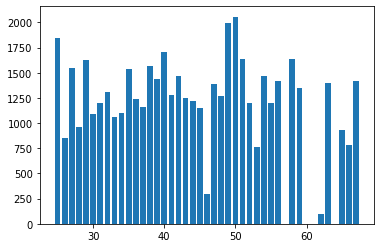

In [88]:
plt.bar(age_amplterm.age, age_amplterm.average_term)
plt.show()

Прямой зависимости возраста и времени работы в компании не наблюдается, но у сотрудников старше 30 и младше 40 время работы в компании ниже чем у тех чей возраст от 48 до 53. Так же наблюдается снижение времени работы сотрудников от 30 и до 35.

3. Есть ли зависимость между возрастом/полом и зарплатой

In [89]:
#Возраст и средний заработок сотрудника
sql_str = 'SELECT  hr_dataset."age", AVG(production_staff."Pay"::numeric) \
AS average_pay FROM hr_dataset JOIN production_staff ON hr_dataset.id = production_staff.id \
GROUP BY hr_dataset."age"'
#sql_str = 'SELECT * FROM production_staff'
age_pay = pd.read_sql_query(sql_str, conn)

conn.commit()
age_pay.head()

,age,average_pay
0,42,16.500000
1,54,23.250000
2,29,21.437500
3,34,23.240833
4,51,22.500000


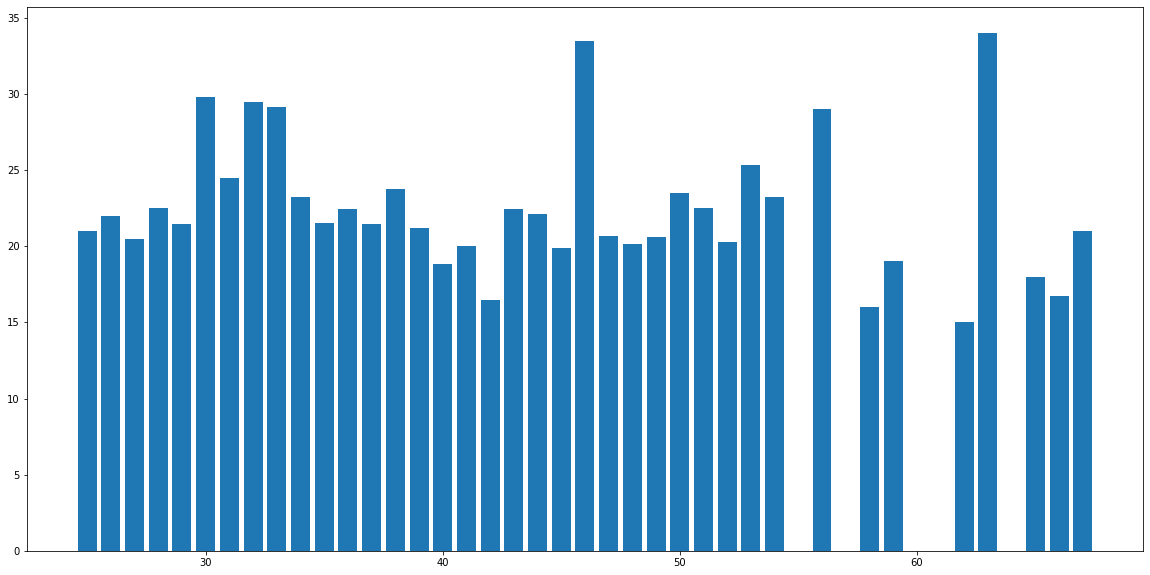

In [90]:
age_pay.dropna(inplace=True)
plt.figure(figsize=(20,10))
plt.bar(age_pay['age'], age_pay['average_pay'])
plt.show()

Чёткой зависимости возраста и заработной платы нет. Самые высокие покаазатели заработной платы у сотрудников 30-34 лет и 45-47 лет.

In [91]:
#Пол и средний заработок сотрудника
sql_str = 'SELECT  hr_dataset."sex", AVG(production_staff."Pay"::numeric) AS average_pay, \
COUNT(hr_dataset."sex") FROM hr_dataset JOIN production_staff ON hr_dataset.id = production_staff.id \
GROUP BY hr_dataset."sex"'

sex_pay = pd.read_sql_query(sql_str, conn)

conn.commit()
sex_pay.head()

,sex,average_pay,count
0,Female,23.396198,152
1,Male,22.272841,104


3. Есть зависимость между продолжительностью работы в компании и семейным положением сотрудника.

In [92]:
sql_str = 'SELECT "marriedid", AVG("Days Employed") FROM hr_dataset GROUP BY "marriedid" '

married_dempl = pd.read_sql_query(sql_str, conn)

conn.commit()
married_dempl.head()

,marriedid,avg
0,0,1328.866310
1,1,1246.235772


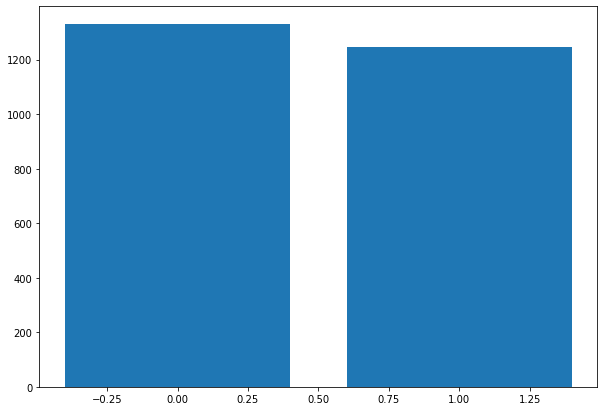

In [93]:
plt.figure(figsize=(10,7))
plt.bar(married_dempl['marriedid'], married_dempl['avg'])
plt.show()

Средняя продолжительность работы женатых/замужних сотрудников ниже чему коллег, но разница не существенна, что может говорить о том что нет чёткой зависимости от семейного статуса сотрудника и временем его работы в компании.

## Часть вторая

Перед вами стоит задача – подготовить аналитический ответ для SMM-отдела компании Skillbox. <br> Объектом анализа является  [паблик Skillbox Вконтакте](https://vk.com/skillbox_education). <br> <br> 
Подключитесь к  API VK и выгрузите посты со стены паблика Skillbox за интересующий период (определите самостоятельно и обоснуйте). Проанализируйте влияние различных факторов (например, времени публикации) на вовлеченность пользователей (количество лайков, комментариев, голосов в опросах). Сделайте аналитику по рубрикам (примеры рубрик: дизайн-битва, игра по управлению), которые есть в паблике. Выбрать нужные посты можно с помощью регулярных выражений. Составьте перечень рекомандаций для SMM-отдела по итогам анализа. <br> <br> 

Дополнительные инструкции по работе с API VK расположены [здесь](https://nbviewer.jupyter.org/github/vikaborel/dstutorials/blob/master/Дополнительные%20инструкции.ipynb).

In [1]:
import pandas as pd
import requests
import yaml
from yaml import load
from pprint import pprint
from datetime import datetime
import time
import matplotlib.pyplot as plt
import numpy as np

In [2]:
f = open('config.yaml', mode = 'r', encoding = 'utf-8')
config = load(f, Loader=yaml.FullLoader)
token = config['access_token']

url = 'https://api.vk.com/method/wall.get'
url_getMembers = 'https://api.vk.com/method/groups.getMembers'

m_params = { 'group_id': 66669811,
            'v': 5.103,
          'access_token': token}

req = requests.get(url_getMembers, params = m_params)
members = req.json()['response']['count']
print("Количество человек в группе: {}".format(members))
# data = (r.json())['response']['items']#[0]#['comments']['count']
#pprint(data[0]['attachments'][1]['type'])

Количество человек в группе: 215617


In [3]:
#создание листов (колонок dataframe), для сбора необходимых данных из выгрузки
id_, text, date, comments, likes, reposts, marked_as_ads, views = [],[],[],[],[],[],[],[]
type_, votes = [],[]

offset = 0
count = 100

#Выбор 1000 постов ~ год.
while offset < 1000:
    
    params = { 'owner_id': -66669811,
          'domain': 'skillbox_education',
          'extended': 1,
          'v': 5.103,
          'count': count,
          'offset': offset,
          'access_token': token}

    r = requests.get(url, params = params)
    data = (r.json())['response']['items']
    
    #Выбрать необходимые данные из JSON
    for i in range(len(data)):
        #найти все голосования
        if 'attachments' in data[i]:
            for a in range(len(data[i]['attachments'])):
                index = -1
                #проверить елси тип равен голосованию
                if data[i]['attachments'][a]['type'] == 'poll':
                    index = a
                    type_.append('poll')
                    votes.append(data[i]['attachments'][a]['poll']['votes'])#получить количество голосов
            if index == -1:
                type_.append('post')
                votes.append(0)
        else:
            type_.append('post')
            votes.append(0)

        id_.append(data[i]['id'])
        text.append(data[i]['text'])
        date.append(datetime.utcfromtimestamp(data[i]['date']).strftime('%Y-%m'))
        comments.append(data[i]['comments']['count'])
        likes.append(data[i]['likes']['count'])
        reposts.append(data[i]['reposts']['count'])
        marked_as_ads.append(data[i]['marked_as_ads'])
        views.append(data[i]['views']['count'])
        
    offset += count
    time.sleep(0.5)
    #print(count, offset, len(views))
    #datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S')

In [4]:
data_dict = {'id_': id_, 'text': text, 'date': date, 'comments': comments, 'likes': likes, 'reposts': likes, 
             'marked_as_ads': marked_as_ads, 'views': views, 'type_': type_, 'votes': votes}
data_df = pd.DataFrame(data_dict)
data_df.head()

,id_,text,date,comments,likes,reposts,marked_as_ads,views,type_,votes
0,63889,Когда игра выглядит реалистичнее самой реально...,2020-05,5,21,21,0,3890,post,0
1,63327,"Друзья, Skillbox и проект [club88414131|«Учите...",2020-05,2,31,31,0,11426,post,0
2,62983,"Что общего между пиццей и знаниями?\n\n★ И то,...",2020-05,2,16,16,0,11125,post,0
3,62721,Приготовьтесь: на этой неделе вас ждет плотное...,2020-05,24,60,60,0,16755,post,0
4,62691,Угадайте мелодии по ритму\n\nПонравилась песня...,2020-05,33,15,15,0,16029,post,0


In [69]:
grouped_data = data_df.groupby('date').agg({'likes': np.mean, 'reposts': np.mean, 'comments':np.mean, 'views': np.mean}).reset_index()
grouped_data.head()

,date,likes,reposts,comments,views
0,2019-03,72.235849,72.235849,3.415094,11918.160377
1,2019-04,78.611111,78.611111,4.185185,12510.379630
2,2019-05,68.584416,68.584416,4.753247,13377.038961
3,2019-06,67.089552,67.089552,9.701493,12583.223881
4,2019-07,46.420290,46.420290,5.913043,9491.144928


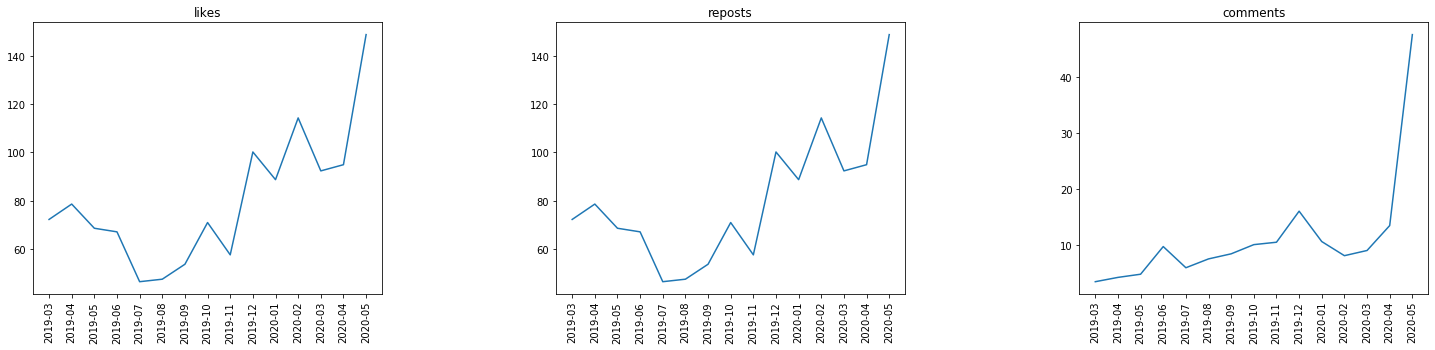

In [71]:
fig, axs = plt.subplots(1,3, gridspec_kw={'hspace': 0.2, 'wspace': 0.5}, figsize=(25,5))
i=0
columns_list = ['likes', 'reposts', 'comments']
while i < 3:
    
    axs[i].plot(grouped_data['date'], grouped_data.iloc[:,[i+1]])
    axs[i].tick_params(axis='x', rotation=90)
    axs[i].set_title(columns_list[i])
    i += 1
    
plt.show()

Количество просмотров, лайков и репостов на данный момент растут, но наблюдался спад активности пользователей с весны до середины лета 2019 года.

Теперь посчитаем индекс вовлечённости пользователей за первый квартал 2020 года.

Для подсчета эффективности работы SMM-команды используют метрику индекс вовлеченности. Индекс рассчитывается как отношение количества подписчиков группы/охвата к сумме комментариев, лайков и репостов всех записей за определенный период.

In [76]:
data_df1 = data_df[(data_df['date'] > '2020-01')&(data_df['date'] < '2020-05')]
eng_rate = (data_df1['comments'].mean() + data_df1['likes'].mean() + data_df1['reposts'].mean()) / data_df1['views'].mean()
print("Индекс вовлечённости: {}".format(eng_rate))

Индекс вовлечённости: 0.010386266861741912


Посчитаем среднее количество голосов в опросах за всё время.

In [8]:
data_df_poll = data_df[data_df['type_'] == 'poll']
print("Cреднее количество голосов в опросах за всё время: {}".format(data_df_poll.votes.mean()))

Cреднее количество голосов в опросах за всё время: 955.5098039215686


In [9]:
#Выбрать рубрики
data_cat_df = data_df[data_df['text'].str.contains('\w*рубрик\w*') == True]
data_cat_df.head()

,id_,text,date,comments,likes,reposts,marked_as_ads,views,type_,votes
62,54207,Реально ли освоить какой-нибудь язык всего за ...,2020-04,8,412,412,0,40847,post,0
69,53799,"Даже не знаю, как сказать… В общем, долго объя...",2020-04,0,37,37,0,19850,post,0
95,52735,"У маркетологов — ресёч и отфитбечить, у дизайн...",2020-03,5,31,31,0,13746,post,0
109,52531,"Получить работу мечты не так сложно, если вы з...",2020-03,0,32,32,0,14589,post,0
157,51826,"Когда-нибудь объясняли ребенку, почему небо го...",2020-02,10,12,12,0,14050,post,0


In [10]:
print("Среднее количество лайков по всем выбраным рубрикам: {}".format(data_cat_df.likes.mean()))
print('----------------------------------------------------------------------------------------')
print("Среднее количество комментариев по всем выбраным рубрикам: {}".format(data_cat_df.comments.mean()))
print('----------------------------------------------------------------------------------------')
print("Среднее количество репостов по всем выбраным рубрикам: {}".format(data_cat_df.reposts.mean()))
print('----------------------------------------------------------------------------------------')
print("Среднее количество просмотров по всем выбраным рубрикам: {}".format(data_cat_df.views.mean()))

Среднее количество лайков по всем выбраным рубрикам: 29.024390243902438
----------------------------------------------------------------------------------------
Среднее количество комментариев по всем выбраным рубрикам: 21.195121951219512
----------------------------------------------------------------------------------------
Среднее количество репостов по всем выбраным рубрикам: 29.024390243902438
----------------------------------------------------------------------------------------
Среднее количество просмотров по всем выбраным рубрикам: 11375.341463414634


In [80]:
#Удалить двойные кавычки из текста
def rm_quotes(row):
    s = row['category'].replace('»','')
    s = s.replace('«','')
    return s

data_cat_df['category'] = data_cat_df['text'].str.extract(r'(([«](.*?)[»])|(\w*Design Battle!\w*))', expand=True)
data_cat_df.replace(np.nan, '', inplace=True)
data_cat_df['category'] = data_cat_df.apply(rm_quotes, axis=1)

#Сгруппировать и посчитать серднее количество лайков, репостов, просмотров и голосов
data_cat_grouped = data_cat_df.groupby('category').agg({'likes':np.mean, 'reposts':np.mean, 'comments':np.mean, 'votes':np.mean, 'views':np.mean}).reset_index()
data_cat_grouped = data_cat_grouped[(data_cat_grouped['category'] != '')&(data_cat_grouped['category'] != 'кирпичом')]
data_cat_grouped

C:\Anaconda3\envs\SkillBox\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Anaconda3\envs\SkillBox\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,category,likes,reposts,comments,votes,views
1,Design Battle!,11.071429,11.071429,13.857143,599.857143,9735.714286
2,HR-совет,34.500000,34.500000,0.000000,0.000000,17219.500000
3,Вопрос-ответ от Skillbox,10.000000,10.000000,47.000000,0.000000,9953.230769
4,Разбор кейса,20.000000,20.000000,0.000000,0.000000,7526.000000
5,Разработчики шутят,32.000000,32.000000,5.000000,0.000000,15460.500000
6,Сленг программиста,31.000000,31.000000,5.000000,0.000000,13746.000000
7,Слово дня,61.500000,61.500000,11.000000,0.000000,11805.000000
8,Шрифт недели от Skillbox,41.000000,41.000000,3.000000,0.000000,9114.666667


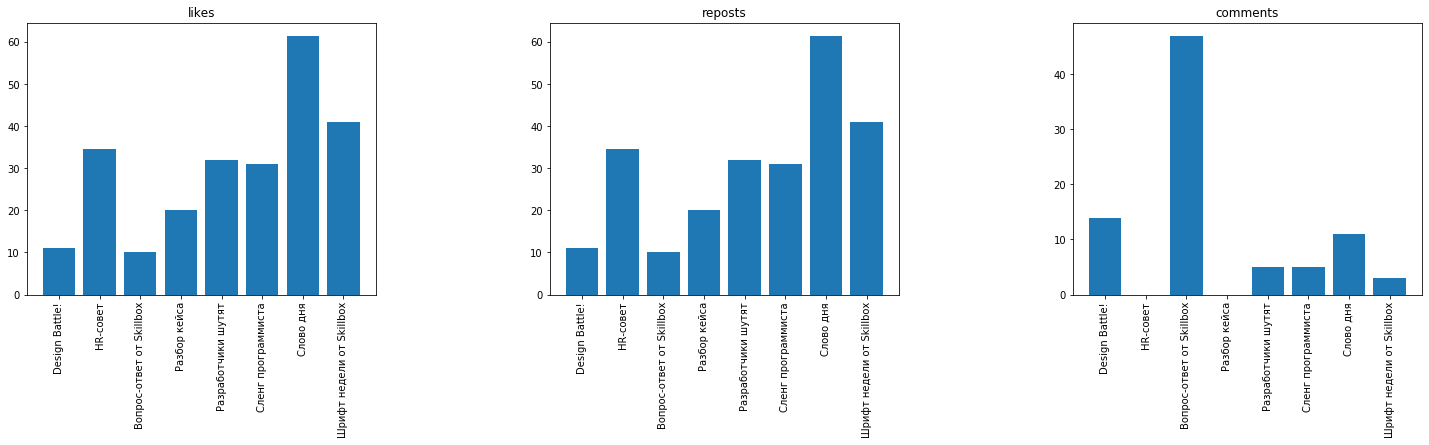

In [81]:
fig, axs = plt.subplots(1,3, gridspec_kw={'hspace': 0.2, 'wspace': 0.5}, figsize=(25,5))
i=0
columns_list = ['likes', 'reposts', 'comments']
while i < 3:
    
    axs[i].bar(data_cat_grouped['category'], data_cat_grouped[columns_list[i]])
    axs[i].tick_params(axis='x', rotation=90)
    axs[i].set_title(columns_list[i])
    i += 1
    
plt.show()

Посчитаем индекс вовлечённости по каждой рубрике

In [82]:
data_cat_grouped['eng_index'] = (data_cat_grouped['likes'] + data_cat_grouped['comments'] + data_cat_grouped['reposts'])/data_cat_grouped['views']
data_cat_grouped

,category,likes,reposts,comments,votes,views,eng_index
1,Design Battle!,11.071429,11.071429,13.857143,599.857143,9735.714286,0.003698
2,HR-совет,34.500000,34.500000,0.000000,0.000000,17219.500000,0.004007
3,Вопрос-ответ от Skillbox,10.000000,10.000000,47.000000,0.000000,9953.230769,0.006731
4,Разбор кейса,20.000000,20.000000,0.000000,0.000000,7526.000000,0.005315
5,Разработчики шутят,32.000000,32.000000,5.000000,0.000000,15460.500000,0.004463
6,Сленг программиста,31.000000,31.000000,5.000000,0.000000,13746.000000,0.004874
7,Слово дня,61.500000,61.500000,11.000000,0.000000,11805.000000,0.011351
8,Шрифт недели от Skillbox,41.000000,41.000000,3.000000,0.000000,9114.666667,0.009326


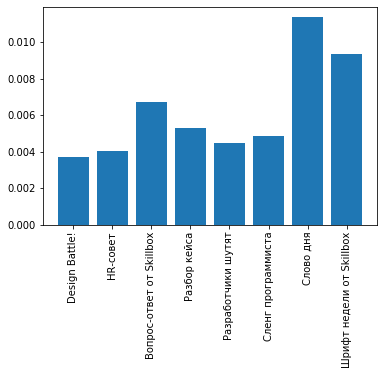

In [79]:
plt.bar(data_cat_grouped['category'], data_cat_grouped['eng_index'])
plt.tick_params(axis='x', rotation=90)
plt.show()